In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manickameenakshisomu","key":"afe75f62c1284db5621676257fab1281"}'}

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12           9970        186  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                          94KB  2024-09-02 10:53:57          38501        671  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                         22KB  2024-10-06 11:27:38           5023         90  1.0              
patricklford/largest-companies-analysis-worldwide            World Top Comp

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:26<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os

In [ ]:
import os

# Define the path to the extracted dataset
path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'

# List the contents of the directory
contents = os.listdir(path)
print("Contents of the dataset directory:", contents)


Contents of the dataset directory: ['New Plant Diseases Dataset(Augmented)', 'test', 'new plant diseases dataset(augmented)']


In [ ]:
import os

# Base path to the dataset
base_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'

# Path to the first directory
first_directory = os.path.join(base_path, 'New Plant Diseases Dataset(Augmented)')

# List the contents of the first directory
contents_first_directory = os.listdir(first_directory)
print("Contents of 'New Plant Diseases Dataset(Augmented)':", contents_first_directory)

# Path to the nested directory
nested_directory = os.path.join(first_directory, 'New Plant Diseases Dataset(Augmented)')

# List the contents of the nested directory
contents_nested_directory = os.listdir(nested_directory)
print("Contents of the nested 'New Plant Diseases Dataset(Augmented)':", contents_nested_directory)

# Path to the training directory
train_directory = os.path.join(nested_directory, 'train')  # Adjust if necessary

# List the contents of the training directory
if os.path.exists(train_directory):
    contents_train_directory = os.listdir(train_directory)
    print("Contents of 'train' directory:", contents_train_directory)
else:
    print("Training directory not found.")


Contents of 'New Plant Diseases Dataset(Augmented)': ['New Plant Diseases Dataset(Augmented)']
Contents of the nested 'New Plant Diseases Dataset(Augmented)': ['train', 'valid']
Contents of 'train' directory: ['Peach___healthy', 'Strawberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Apple___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Tomato___healthy', 'Potato___Early_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Grape___Black_rot', 'Pepper,_bell___healthy', 'Soybean___healthy', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Squash__

In [ ]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
dataset_directory = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/'


In [ ]:
import tensorflow as tf

img_height = 180  # adjust as needed
img_width = 180   # adjust as needed
batch_size = 32   # adjust as needed

# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,  # Use 20% of data for validation
    subset="training"
)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,  # Use 20% of data for validation
    subset="validation"
)


Found 175767 files belonging to 3 classes.
Using 140614 files for training.
Found 175767 files belonging to 3 classes.
Using 35153 files for validation.


In [ ]:
dataset_directory = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/'
print(os.listdir(dataset_directory))


['New Plant Diseases Dataset(Augmented)', 'test', 'new plant diseases dataset(augmented)']


In [ ]:
class_names = os.listdir(dataset_directory)
print("Class names:", class_names)

Class names: ['New Plant Diseases Dataset(Augmented)', 'test', 'new plant diseases dataset(augmented)']


In [ ]:
MyCnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Get the number of classes
class_names = train_ds.class_names
num_classes = len(class_names)

# Define the base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the model
MyCnn = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')  # Use num_classes here
])

# Compile the model
MyCnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
retVal = MyCnn.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[early_stopping])


<ipython-input-28-33a9a202c51f>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')


Epoch 1/20
  20/4395 ━━━━━━━━━━━━━━━━━━━━ 1:11:02 974ms/step - accuracy: 0.4814 - loss: 0.9764

KeyboardInterrupt: 

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers

# Define parameters
img_height = 64
img_width = 64
batch_size = 32
num_images_to_use = 11000 # Increase number of images

# Base path to the dataset
base_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'
nested_directory = os.path.join(base_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)')
train_directory = os.path.join(nested_directory, 'train')

# Load full training dataset to retrieve class names
full_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training"
)

# Retrieve and print class names
class_names = full_train_ds.class_names
print("Class names:", class_names)

# Use a larger subset of images for training
train_ds = full_train_ds.take(num_images_to_use // batch_size)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation"
)
val_ds = val_ds.take(num_images_to_use // (4 * batch_size))  # Adjust this as needed

# Define the custom CNN model
MyCnn = tf.keras.models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Use the number of classes
])

# Compile the model
MyCnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = MyCnn.fit(train_ds, validation_data=val_ds, epochs=20)  # Increase epochs

# Optionally, save the model
MyCnn.save('plant_disease_classifier_custom_cnn.h5')


Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___S

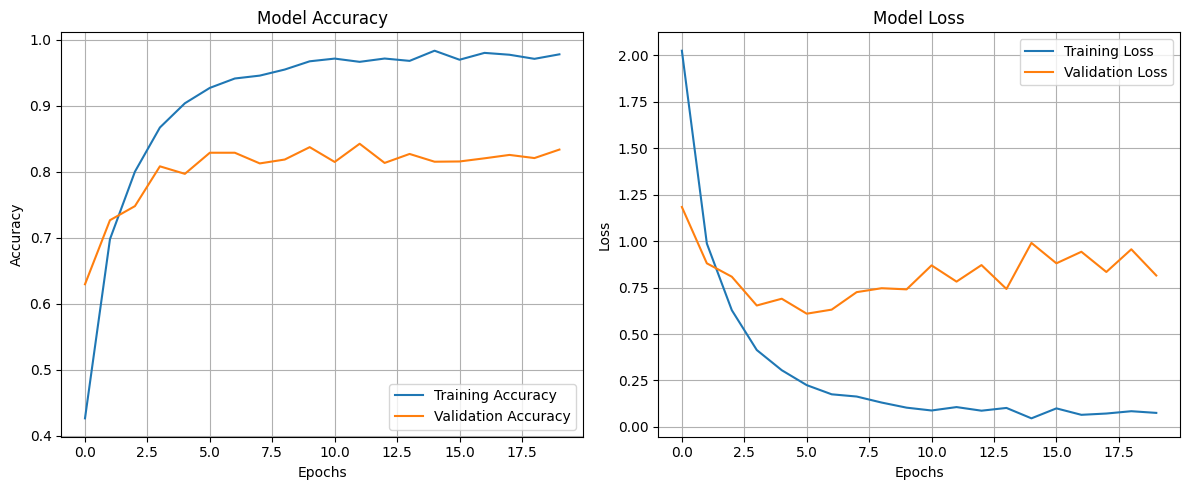

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step


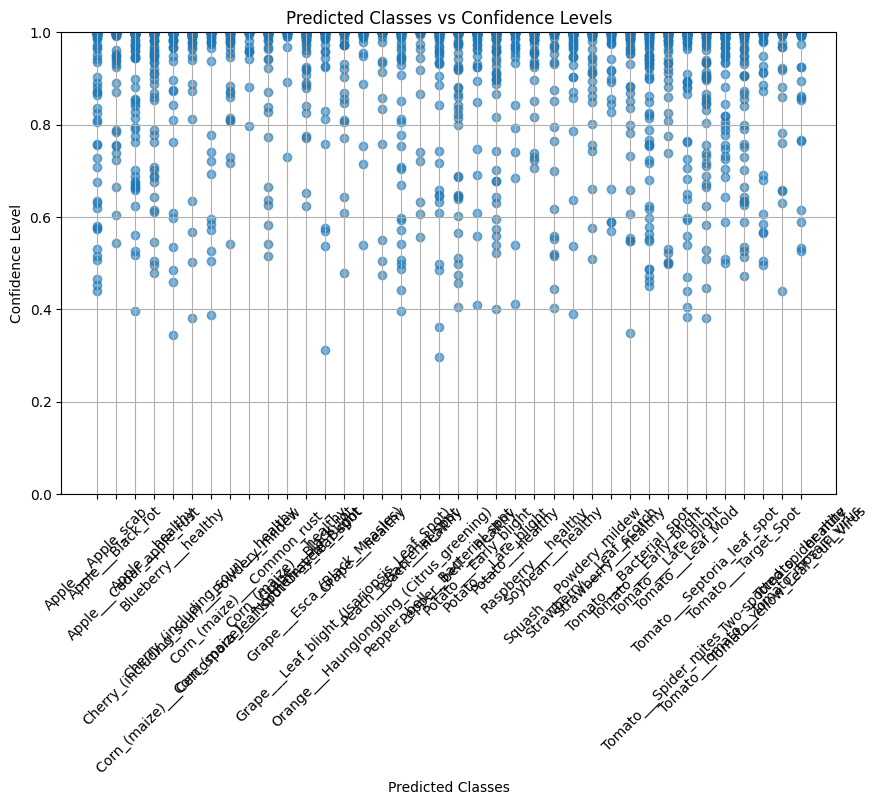

Predicted: Corn_(maize)___Northern_Leaf_Blight, Confidence: 1.00
Predicted: Grape___Black_rot, Confidence: 1.00
Predicted: Blueberry___healthy, Confidence: 1.00
Predicted: Cherry_(including_sour)___Powdery_mildew, Confidence: 0.95
Predicted: Tomato___Bacterial_spot, Confidence: 0.88
Predicted: Grape___Black_rot, Confidence: 1.00
Predicted: Corn_(maize)___healthy, Confidence: 1.00
Predicted: Tomato___Early_blight, Confidence: 0.92
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00
Predicted: Apple___Cedar_apple_rust, Confidence: 0.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the validation dataset
val_preds = MyCnn.predict(val_ds)

# Get the predicted classes and their corresponding probabilities
predicted_classes = np.argmax(val_preds, axis=1)
confidence_levels = np.max(val_preds, axis=1)  # Confidence is the highest probability

# Get the true labels
y_true = np.concatenate([y.numpy() for x, y in val_ds], axis=0)

# Visualizing the confidence levels
plt.figure(figsize=(10, 6))
plt.scatter(predicted_classes, confidence_levels, alpha=0.6)
plt.title('Predicted Classes vs Confidence Levels')
plt.xlabel('Predicted Classes')
plt.ylabel('Confidence Level')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.grid()
plt.ylim(0, 1)  # Confidence levels range from 0 to 1
plt.show()

# Print sample predictions with their confidence levels
for i in range(10):  # Display first 10 predictions
    print(f"Predicted: {class_names[predicted_classes[i]]}, Confidence: {confidence_levels[i]:.2f}")
